# StackOverflow Surveys Info
## Tech Understanding and Trends

### Table of Contents

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Visualization
6. Evaluation

## 1. Business Understanding

This notebook contains the analytics for the 2020 and previous years of the Stackoverflow Survey and the insights of some users that are focused on Data Science and Machine Learning topics

1. About the Gender Gap within Data Science enviroment: How is the Gender Proportion in this survey? Do women answer the same than men?
2. Which are the countries with more Data Scientist & Machine Learning programmers? -at least between those who have answered this survey?- and what about DS&ML women?
3. Which Programming Language are the most popular? and which are between women according to the survey?
4. What is the best way for code sharing?
5. How well can we predict an individual's job satisfaction? What aspects correlate well to job satisfaction?
6. Bonus: What are the countries with the highest and lowest salary for this kind of specialist?


## 2. Data Understanding

### First of all we need to import the libraries we need

In [84]:
# Import Packages we need:
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
# module to manage with files and directories
import glob 
#collection of functions 
import matplotlib.pyplot as plt 
# linear algebra
import numpy as np 
# library for making statistical graphics
import seaborn as sns 
# Plotly graphics library
import plotly.express as px
# Squarify graphics library need installation: pip install squarify (algorithm for treemap)
import squarify
import warnings

from collections import Counter
from scipy.stats.stats import pearsonr
from string import ascii_letters

# Some functions to make plots with Plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)

pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')
%matplotlib inline

In [85]:
# Gather necessary data to answer the questions
# We load the data and
# import the csv files as dataframes

df_survey_orig = pd.read_csv("./input/2020/survey_results_public.csv",header=0)

# but keep them independently
questions = df_survey_orig.iloc[0]
df_survey_orig_schema = pd.read_csv("./input/2020/survey_results_schema.csv",header=0)

# Load 2019 Kaggle survey
df_2019_s_survey = pd.read_csv("./input/2019/survey_results_public.csv",header=0)

# Load 2018 Kaggle survey
df_2018_s_survey = pd.read_csv("./input/2018/survey_results_public.csv",header=0)

df = df_survey_orig

In [86]:
# There are 61 columns (61 questions) and 64460 answers (almost 65K)
df.shape

(64461, 61)

In [87]:
# Let's take a look at the header of the file
df.head()

Respondent                                         MainBranch Hobbyist  \
0           1                     I am a developer by profession      Yes   
1           2                     I am a developer by profession       No   
2           3                        I code primarily as a hobby      Yes   
3           4                     I am a developer by profession      Yes   
4           5  I used to be a developer by profession, but no...      Yes   

    Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0   NaN         13  Monthly        NaN            NaN             Germany   
1   NaN         19      NaN        NaN            NaN      United Kingdom   
2   NaN         15      NaN        NaN            NaN  Russian Federation   
3  25.0         18      NaN        NaN            NaN             Albania   
4  31.0         16      NaN        NaN            NaN       United States   

     CurrencyDesc CurrencySymbol DatabaseDesireNextYear  \
0   European Euro            EUR   Microsoft SQL Server   
1  Pound sterling            GBP                    NaN   
2             NaN            NaN                    NaN   
3    Albanian lek            ALL                    NaN   
4             NaN            NaN       MySQL;PostgreSQL   

                          DatabaseWorkedWith  \
0  Elasticsearch;Microsoft SQL Server;Oracle   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4              MySQL;PostgreSQL;Redis;SQLite   

                                             DevType  \
0  Developer, desktop or enterprise applications;...   
1            Developer, full-stack;Developer, mobile   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                           EdLevel  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2                                              NaN   
3  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                          Employment  \
0  Independent contractor, freelancer, or self-em...   
1                                 Employed full-time   
2                                                NaN   
3                                                NaN   
4                                 Employed full-time   

                      Ethnicity Gender  \
0  White or of European descent    Man   
1                           NaN    NaN   
2                           NaN    NaN   
3  White or of European descent    Man   
4  White or of European descent    Man   

                                          JobFactors                 JobSat  \
0  Languages, frameworks, and other technologies ...     Slightly satisfied   
1                                                NaN      Very dissatisfied   
2                                                NaN                    NaN   
3  Flex time or a flexible schedule;Office enviro...  Slightly dissatisfied   
4                                                NaN                    NaN   

                                             JobSeek  \
0       I am not interested in new job opportunities   
1       I am not interested in new job opportunities   
2                                                NaN   
3  I’m not actively looking, but I am open to new...   
4                                                NaN   

     LanguageDesireNextYear        LanguageWorkedWith  \
0    C#;HTML/CSS;JavaScript    C#;HTML/CSS;JavaScript   
1              Python;Swift          JavaScript;Swift   
2  Objective-C;Python;Swift  Objective-C;Python;Swift   
3                       NaN                       NaN   
4           Java;Ruby;Scala         HTML/CSS;Ruby;SQL   

             MiscTechDesir

In [88]:
# Let's see some statistics
df.describe()

Respondent           Age      CompTotal  ConvertedComp   WorkWeekHrs
count  64461.000000  45446.000000   3.482600e+04   3.475600e+04  41151.000000
mean   32554.079738     30.834111  3.190464e+242   1.037561e+05     40.782174
std    18967.442360      9.585392            inf   2.268853e+05     17.816383
min        1.000000      1.000000   0.000000e+00   0.000000e+00      1.000000
25%    16116.000000     24.000000   2.000000e+04   2.464800e+04     40.000000
50%    32231.000000     29.000000   6.300000e+04   5.404900e+04     40.000000
75%    49142.000000     35.000000   1.250000e+05   9.500000e+04     44.000000
max    65639.000000    279.000000  1.111111e+247   2.000000e+06    475.000000

We can see that not all questions have been answered

Let's see the questions of the 2020 survey

In [89]:
df_survey_orig_schema

Column                                       QuestionText
0           Respondent  Randomized respondent ID number (not in order ...
1           MainBranch  Which of the following options best describes ...
2             Hobbyist                            Do you code as a hobby?
3                  Age  What is your age (in years)? If you prefer not...
4           Age1stCode  At what age did you write your first line of c...
..                 ...                                                ...
56  WebframeWorkedWith  Which web frameworks have you done extensive d...
57       WelcomeChange  Compared to last year, how welcome do you feel...
58         WorkWeekHrs  On average, how many hours per week do you wor...
59           YearsCode  Including any education, how many years have y...
60        YearsCodePro  NOT including education, how many years have y...

[61 rows x 2 columns]

In [90]:
# Now let's see if there is NaNs in the dataset, that means questions not answered
df.isnull().sum()

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64

We can confirm that there are some questions not answered. 
We can see that the firsts (from the first question until Question 3) are all answered, but people tend to get tired of answering soon...

Now we make some preparations to data: only shorten some long names by now 

In [91]:
df

Respondent                                         MainBranch Hobbyist  \
0               1                     I am a developer by profession      Yes   
1               2                     I am a developer by profession       No   
2               3                        I code primarily as a hobby      Yes   
3               4                     I am a developer by profession      Yes   
4               5  I used to be a developer by profession, but no...      Yes   
...           ...                                                ...      ...   
64456       64858                                                NaN      Yes   
64457       64867                                                NaN      Yes   
64458       64898                                                NaN      Yes   
64459       64925                                                NaN      Yes   
64460       65112                                                NaN      Yes   

        Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0       NaN         13  Monthly        NaN            NaN             Germany   
1       NaN         19      NaN        NaN            NaN      United Kingdom   
2       NaN         15      NaN        NaN            NaN  Russian Federation   
3      25.0         18      NaN        NaN            NaN             Albania   
4      31.0         16      NaN        NaN            NaN       United States   
...     ...        ...      ...        ...            ...                 ...   
64456   NaN         16      NaN        NaN            NaN       United States   
64457   NaN        NaN      NaN        NaN            NaN             Morocco   
64458   NaN        NaN      NaN        NaN            NaN            Viet Nam   
64459   NaN        NaN      NaN        NaN            NaN              Poland   
64460   NaN        NaN      NaN        NaN            NaN               Spain   

         CurrencyDesc CurrencySymbol  \
0       European Euro            EUR   
1      Pound sterling            GBP   
2                 NaN            NaN   
3        Albanian lek            ALL   
4                 NaN            NaN   
...               ...            ...   
64456             NaN            NaN   
64457             NaN            NaN   
64458             NaN            NaN   
64459             NaN            NaN   
64460             NaN            NaN   

                                  DatabaseDesireNextYear  \
0                                   Microsoft SQL Server   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                       MySQL;PostgreSQL   
...                                                  ...   
64456                                                NaN   
64457  Cassandra;Couchbase;DynamoDB;Elasticsearch;Fir...   
64458                                                NaN   
64459    DynamoDB;Elasticsearch;MongoDB;MySQL;PostgreSQL   
64460                       MariaDB;Microsoft SQL Server   

                                      DatabaseWorkedWith  \
0              Elasticsearch;Microsoft SQL Server;Oracle   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                          MySQL;PostgreSQL;Redis;SQLite   
...                                                  ...   
64456                                                NaN   
64457  Cassandra;Couchbase;DynamoDB;Elasticsearch;Fir...   
64458                                                NaN   
64459                                             Oracle   
64460          MariaDB;Microsoft SQL Server;MySQL;Oracle   

                                                 DevType  \
0      Developer, desktop or enterprise applications;...   
1                D

In [92]:
# Short some long names
countries_df=df['Country'].drop_duplicates()
len(countries_df)

184

# Insights Part 1

Let's see the proportion of Gender on this survey

In [93]:
gender_df_count = pd.DataFrame(df["Gender"].value_counts())
gender_df_count = gender_df_count.reset_index(drop=False)
gender_df_count.columns = ["Gender","Count"]

In [94]:
fig = px.bar(
    gender_df_count, 
    x='Count', 
    y="Gender", 
    orientation='h', 
    title='2020 StackOverflow Gender distribution', 
    width=800,
    height=400 
)

fig.show()

There are few women compare to man, let's see if this trend happened in the past with other surveys

Let's compare the gender proportion of this survey and year with the results of the 2018, 2019 Kaggle survey and 2020 Stackoverflow

In [95]:
#Prepare the data for visualize the Statistics graphic
gender_dict = {"Nonbinary": "Others", 
               "Prefer not to say": "Others",
               "Prefer to self-describe": "Others",
               "Non-binary, genderqueer, or gender non-conforming": "Others",     
               "Woman;Non-binary, genderqueer, or gender non-conforming": "Others",               
               "Man;Non-binary, genderqueer, or gender non-conforming": "Others",
               "Woman;Man": "Others",
               "Woman;Man;Non-binary, genderqueer, or gender non-conforming": "Others",
               "What is your gender? - Selected Choice": "Others",
               "Male": "Man",
               "Female": "Woman",
               "Female;Transgender": "Others",
               "Male;Non-binary, genderqueer, or gender non-conforming": "Others",
               "Female;Transgender": "Others",
               "Male;Non-binary, genderqueer, or gender non-conforming": "Others",
               "Transgender": "Others",
               "Female;Male": "Others",
               "Transgender;Non-binary, genderqueer, or gender non-conforming": "Others",
               "Female;Male;Transgender;Non-binary, genderqueer": "Others",
               "Female;Non-binary, genderqueer, or gender non-conforming": "Others",               
               "Male;Transgender": "Others",
               "Female;Transgender;Non-binary, genderqueer, or gender non-conforming":"Others",
               "Female;Male;Transgender":"Others",
               "Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Others",
               "Female;Male;Non-binary, genderqueer, or gender non-conforming":"Others",
               "Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Others"
               
              }
df["Gender"] = df["Gender"].replace(gender_dict)
df_2019_s_survey["Gender"] = df_2019_s_survey["Gender"].replace(gender_dict)
df_2018_s_survey["Gender"] = df_2018_s_survey["Gender"].replace(gender_dict)
#df_2019_k_survey["Q2"] = df_2019_k_survey["Q2"].replace(gender_dict)
#df_2018_k_survey["Q1"] = df_2018_k_survey["Q1"].replace(gender_dict)

In [96]:
#Prepare the data for visualize the Statistics graphic

gender_df_count = pd.DataFrame(df["Gender"].value_counts())
gender_df_count = gender_df_count.reset_index(drop=False)
gender_df_count.columns = ["Gender","Count"]

gender_2020_s_df_count = pd.DataFrame(df["Gender"].value_counts())
gender_2020_s_df_count = gender_2020_s_df_count.reset_index(drop=False)
gender_2020_s_df_count.columns = ["Gender","Count"]

gender_2019_s_df_count = pd.DataFrame(df_2019_s_survey["Gender"].value_counts())
gender_2019_s_df_count = gender_2019_s_df_count.reset_index(drop=False)
gender_2019_s_df_count.columns = ["Gender","Count"]

gender_2018_s_df_count = pd.DataFrame(df_2018_s_survey["Gender"].value_counts())
gender_2018_s_df_count = gender_2018_s_df_count.reset_index(drop=False)
gender_2018_s_df_count.columns = ["Gender","Count"]

In [97]:
gender_df_count

Gender  Count
0     Man  46013
1   Woman   3844
2  Others    700

In [98]:
gender_2019_s_df_count

Gender  Count
0     Man  77919
1   Woman   6344
2  Others   1143

In [99]:
gender_2018_s_df_count

Gender  Count
0     Man  59458
1   Woman   4025
2  Others    986

In [100]:
x=gender_df_count['Gender']
x_c=gender_2019_s_df_count['Gender']
x_d=gender_2018_s_df_count['Gender']

trace3 = {
  'x': x_d,
  'y': gender_2018_s_df_count['Count'],
  'name': '2018 StackOverflow Survey',
  'type': 'bar',
  'marker_color':'rgb(55, 83, 109)'
};
trace2 = {
  'x': x_c,
  'y': gender_2019_s_df_count['Count'],
  'name': '2019 StackOverflow Survey',
  'type': 'bar',
  'marker_color':'rgb(69,117,180)'
};
trace1 = {
  'x': x,
  'y': gender_df_count['Count'],
  'name': '2020 StackOverflow Survey',
  'type': 'bar',
  'marker_color':'rgb(116,173,209)'
  
};


data = [trace3, trace2, trace1];
layout = {
  'xaxis': {'title': 'Gender Distribution'},
  'barmode': 'relative',
  'title': 'Distribution of Gender on StackOverflow statistics 2018,2019,2020'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

We can confirm there are much more men than women, at least answering this kind of surveys

Now we can answer the second question: 
2. Which are the countries with more Data Scientist & Machine Learning programmers? -at least between those who have answered this survey?-
We can say that USA and India are the countries with more DS & ML. 

In [101]:
# Select the roles Data Scientist or Machine Learning Engineer
ds = df[(df['DevType']=='Data scientist or machine learning specialist')]

In [102]:
dscountry = ds['Country'].value_counts().reset_index()
dscountry = dscountry.sort_values(['Country'])
dscountry.columns = [
    'country', 
    'counts']

In [103]:
dscountry[-2:]

country  counts
1          India      54
0  United States      83

In [104]:
dscountry

country  counts
56              Mexico       1
40          Costa Rica       1
41             Romania       1
43               Nepal       1
44               Chile       1
45             Finland       1
46             Iceland       1
47             Estonia       1
42                Oman       1
49         New Zealand       1
48              Latvia       1
54   Republic of Korea       1
53         Isle of Man       1
55              Uganda       1
52             Tunisia       1
51            Bulgaria       1
50            Slovakia       1
39           Singapore       2
38         South Korea       2
36             Morocco       2
35  Hong Kong (S.A.R.)       2
34        South Africa       2
33             Ukraine       2
32            Portugal       2
31            Pakistan       2
30              Serbia       2
29           Indonesia       2
37                Iran       2
28            Thailand       2
26             Austria       2
27          Luxembourg       2
25               Kenya       3
24           Argentina       3
23  Russian Federation       3
22             Denmark       3
21         Philippines       3
20               Japan       3
19             Hungary       3
18              Brazil       4
17              Turkey       4
16               Italy       5
15              Sweden       5
14             Belgium       5
13            Viet Nam       6
11              Poland       7
10               Spain       7
9              Ireland       7
8               Israel       7
12         Switzerland       7
7          Netherlands       8
6               France      11
5               Canada      11
4            Australia      12
3              Germany      20
2       United Kingdom      40
1                India      54
0        United States      83

In [105]:
top_country = dscountry[dscountry.counts>1]
top_country = top_country.sort_values(['counts'])
top_country.columns = [
    'country', 
    'counts']
top_country

country  counts
39           Singapore       2
27          Luxembourg       2
26             Austria       2
28            Thailand       2
37                Iran       2
29           Indonesia       2
31            Pakistan       2
30              Serbia       2
33             Ukraine       2
34        South Africa       2
35  Hong Kong (S.A.R.)       2
36             Morocco       2
38         South Korea       2
32            Portugal       2
21         Philippines       3
19             Hungary       3
22             Denmark       3
20               Japan       3
24           Argentina       3
25               Kenya       3
23  Russian Federation       3
18              Brazil       4
17              Turkey       4
16               Italy       5
15              Sweden       5
14             Belgium       5
13            Viet Nam       6
12         Switzerland       7
8               Israel       7
10               Spain       7
11              Poland       7
9              Ireland       7
7          Netherlands       8
6               France      11
5               Canada      11
4            Australia      12
3              Germany      20
2       United Kingdom      40
1                India      54
0        United States      83

In [106]:
fig = px.bar(
    dscountry, 
    x='counts', 
    y="country", 
    orientation='h', 
    title='Country distribution', 
    width=1000,
    height=1000 
)

fig.show()

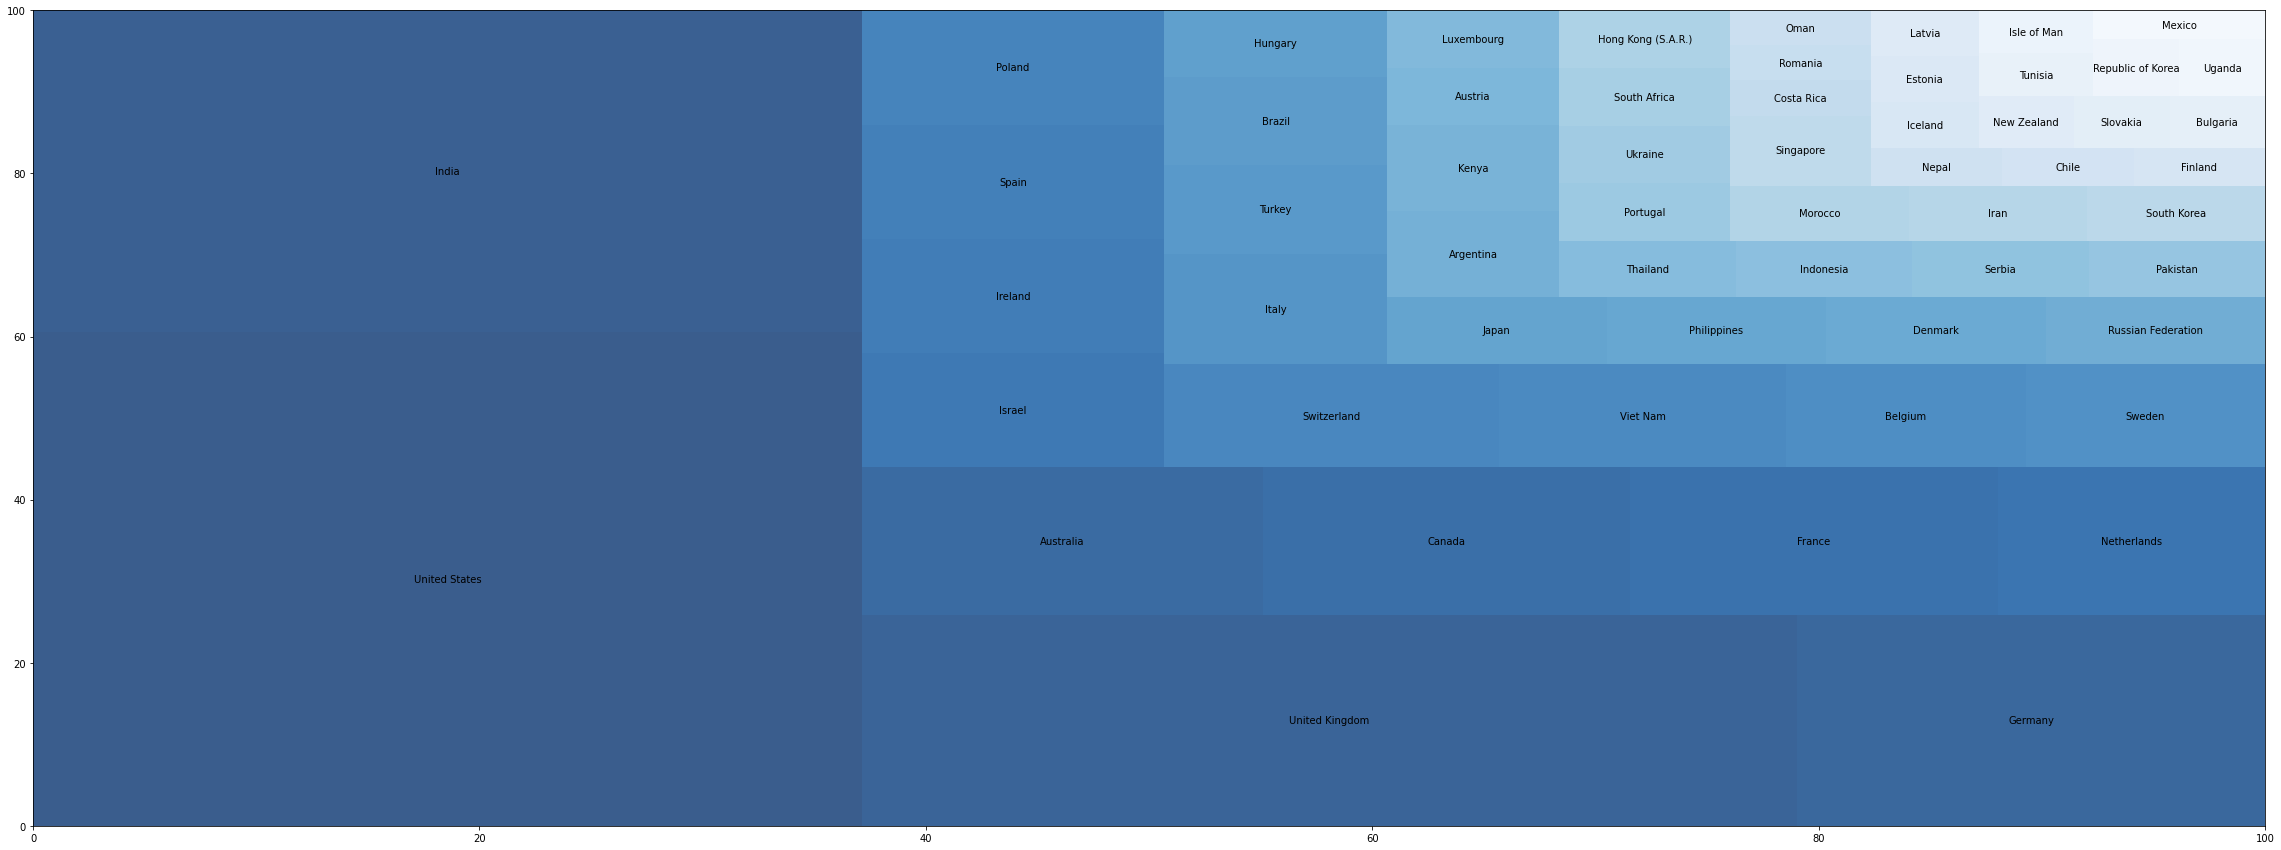

In [107]:
tree=ds['Country'].value_counts().to_frame()
squarify.plot(sizes=tree['Country'].values,label=tree.index,color=sns.color_palette("Blues_r",58),alpha=.8)

plt.rcParams.update({'font.size':18})
fig=plt.gcf()
fig.set_size_inches(40,15)
plt.show()

Now let's see how many Data Scientist or Machine Learning Engineer Women have responded this survey...
Really few... In USA only 16 

In [108]:
dscountry = df[((df['DevType']=='Data scientist or machine learning specialist') & (df['Gender']=='Woman'))]
dscountry = dscountry.value_counts('Country').reset_index()
dscountry = dscountry.sort_values(['Country'])
dscountry.columns = [
    'country', 
    'counts']
dscountry = dscountry.sort_values(['counts'])


In [109]:
fig = px.bar(
    dscountry, 
    x='counts', 
    y="country", 
    orientation='h', 
    title='Country distribution per Woman and Data Scientist/Machine Learning Engineer', 
    width=1000,
    height=1000 
)

fig.show()

Funny! Now let's go to the third question

In [110]:
def plot_heatmap_mean(df, feature1, feature2, feature3, color, title):
    tmp = df.groupby([feature1, feature2])[feature3].mean()
    df1 = tmp.reset_index()
    matrix = df1.pivot(feature1, feature2, feature3)
    fig, (ax1) = plt.subplots(ncols=1, figsize=(16,6))
    sns.heatmap(matrix, 
        xticklabels=matrix.columns,
        yticklabels=matrix.index,ax=ax1,linewidths=.1,annot=True,cmap=color)
    plt.title(title, fontsize=14)
    plt.show()

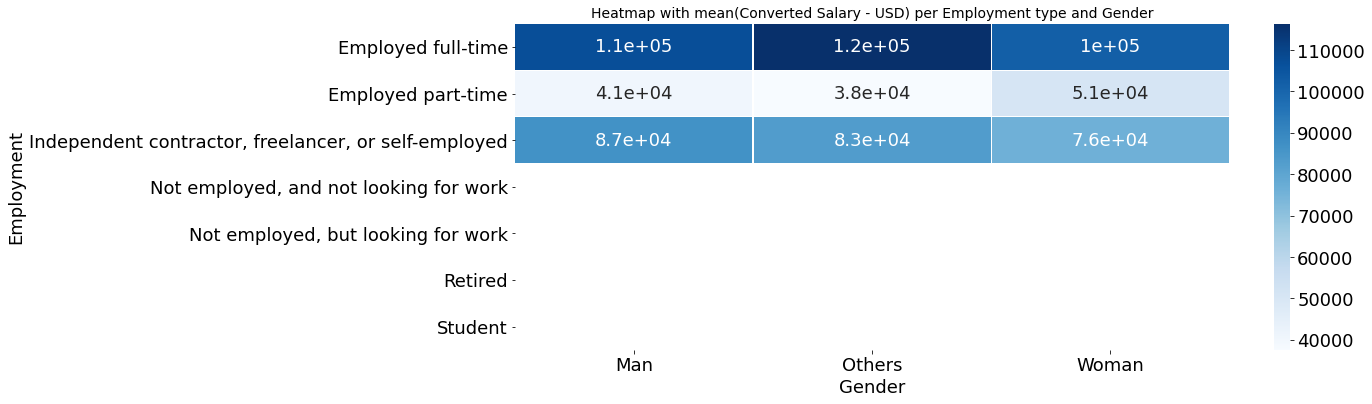

In [111]:
plot_heatmap_mean(df, 'Employment', 'Gender','ConvertedComp', "Blues", "Heatmap with mean(Converted Salary - USD) per Employment type and Gender")

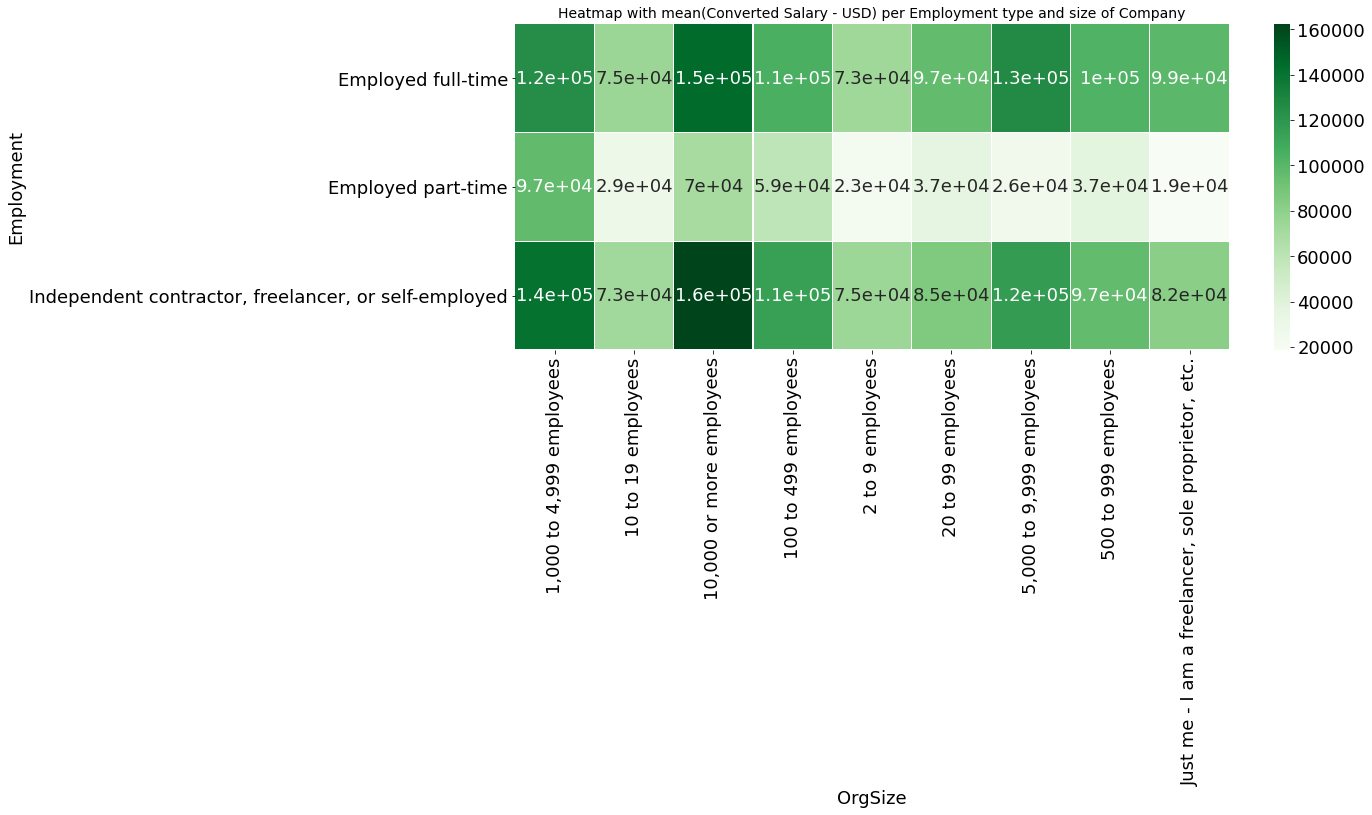

In [112]:


plot_heatmap_mean(df,'Employment', 'OrgSize','ConvertedComp', "Greens", "Heatmap with mean(Converted Salary - USD) per Employment type and size of Company")



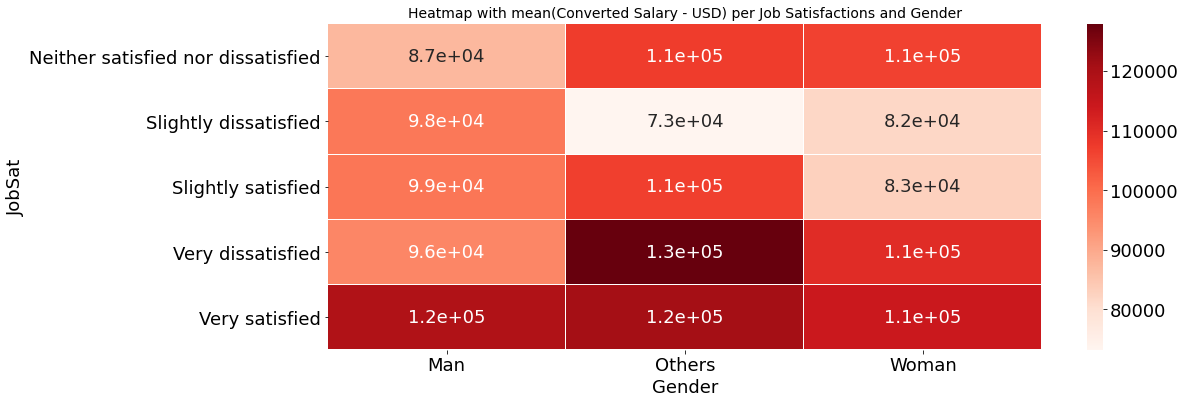

In [113]:
plot_heatmap_mean(df,'JobSat', 'Gender','ConvertedComp', "Reds", "Heatmap with mean(Converted Salary - USD) per Job Satisfactions and Gender")


3. Which are the 3 most popular:
    a) Programming Language
    b) execution environment
    c) visualization tools    
   according to the survey?

Let's find out the Programming languages:

In [264]:
#new_df = df['Country']
new_df = df[['LanguageWorkedWith','Country']]

In [263]:

# dropp na
new_df.dropna(inplace = True)
new_df

lang_list = []
for each in list(new_df['LanguageWorkedWith'].value_counts().index):
    splited = each.split(";")
    for each in splited:
        lang_list.append(each)
lang_list = list(set(lang_list))


In [244]:
top_country_list = top_country.country

In [253]:
def get_language_country(df, col_country, col_lang, top_country ):    
        
    '''
    INPUT:
    df - Dataframe
    col_country - Column name in df (as string) where the countries are stored
    col_lang - Language column in df (as string) where the languages are stored

    
    OUTPUT:
    sorted_lang_country_table: Overal currently worked languages per country sorted as descending (as Series)
    lang_list:    A list containing unique languages
    
    '''
    
    # create new df
    new_df = df[[col_country,col_lang]]
   # print (new_df)
        # dropp na
    new_df.dropna(inplace = True)    
    #print (new_df)
    
    # create list for separated languages
    lang_list = []
    for each in list(new_df[col_lang].value_counts().index):
        splited = each.split(";")
        for each in splited:
            lang_list.append(each)
    lang_list = list(set(lang_list))
   # print (lang_list)
    
    # Arranging LanguageWorkedWith column by
    # seperating into several columns
    for lang in lang_list:

        new_df[lang] = new_df[col_lang].str.split(";")
        new_df[lang] = [lang in row for row in new_df[lang]]
        new_df[lang] = new_df[lang].astype(int).replace({False: 0, True: 1})

    sorted_lang_list_table= new_df.iloc[:,2:].mean().sort_values(ascending = False)

    
    # print (new_df)
    # Sorting languages descending and creating new list
    sorted_lang_list = new_df.iloc[:,2:].mean().sort_values(ascending = False).index
    #print (sorted_lang_list)
    
    
    # Creating series for language statistics of each country
    # and creating df from those series
    series_list = []
    for country in top_country:
        #print (country)
        country_lang_percent = new_df[new_df.Country == country].iloc[:,2:].mean().reindex(sorted_lang_list)
       # print (country_lang_percent)
        series_list.append(country_lang_percent)
   
    country_lang_percent_df = pd.concat(series_list, axis = 1)
    country_lang_percent_df.columns = top_country
    country_lang_percent_df = country_lang_percent_df.transpose()
    
    country_lang_percent= country_lang_percent.transpose()
    #print (country_lang_percent)
    
    return sorted_lang_list_table, country_lang_percent_df, sorted_lang_list   


In [257]:
sorted_lang_percent_table, country_lang_percent_df, lang_list = get_language_country(new_df, "Country", "LanguageWorkedWith",top_country_list)

In [273]:
sorted_lang_percent_table

JavaScript               0.676601
HTML/CSS                 0.630573
SQL                      0.547475
Python                   0.440709
Java                     0.402140
Bash/Shell/PowerShell    0.330789
C#                       0.314424
PHP                      0.261546
TypeScript               0.254070
C++                      0.238889
C                        0.217627
Go                       0.087804
Kotlin                   0.077870
Ruby                     0.070515
Assembly                 0.061923
VBA                      0.060982
Swift                    0.059204
R                        0.057304
Rust                     0.051047
Objective-C              0.040782
Dart                     0.039736
Scala                    0.035763
Perl                     0.031301
Haskell                  0.021297
Julia                    0.009045
dtype: float64

In [284]:
country_lang_percent_df.iloc[:,:5]

JavaScript  HTML/CSS       SQL    Python      Java
country                                                               
Singapore             0.694175  0.597087  0.538835  0.480583  0.446602
Luxembourg            0.675676  0.540541  0.594595  0.405405  0.567568
Austria               0.654224  0.646365  0.561886  0.402750  0.524558
Thailand              0.723214  0.732143  0.517857  0.419643  0.401786
Iran                  0.705336  0.658933  0.531323  0.408353  0.334107
Indonesia             0.681704  0.694236  0.556391  0.355890  0.471178
Pakistan              0.690202  0.701729  0.540346  0.354467  0.422190
Serbia                0.663082  0.591398  0.541219  0.333333  0.397849
Ukraine               0.630802  0.527426  0.468354  0.333333  0.293249
South Africa          0.688341  0.677130  0.621076  0.354260  0.358744
Hong Kong (S.A.R.)    0.734043  0.606383  0.595745  0.489362  0.382979
Morocco               0.731034  0.765517  0.655172  0.462069  0.531034
South Korea           0.575581  0.470930  0.412791  0.453488  0.482558
Portugal              0.727273  0.633609  0.556474  0.404959  0.407713
Philippines           0.736842  0.757310  0.628655  0.362573  0.494152
Hungary               0.675676  0.651652  0.612613  0.414414  0.462462
Denmark               0.679144  0.644385  0.572193  0.385027  0.286096
Japan                 0.700000  0.623077  0.423077  0.507692  0.453846
Argentina             0.738506  0.666667  0.577586  0.385057  0.353448
Kenya                 0.730769  0.773504  0.576923  0.474359  0.448718
Russian Federation    0.553517  0.501529  0.513761  0.429154  0.307849
Brazil                0.713222  0.652390  0.588454  0.394165  0.419615
Turkey                0.627019  0.574156  0.543319  0.395007  0.465492
Italy                 0.693424  0.626692  0.614120  0.408124  0.485493
Sweden                0.633293  0.568154  0.469240  0.425814  0.325694
Belgium               0.691566  0.689157  0.612048  0.416867  0.440964
Viet Nam              0.702128  0.624113  0.453901  0.361702  0.432624
Switzerland           0.656463  0.624150  0.576531  0.472789  0.465986
Israel                0.595278  0.504216  0.455312  0.517707  0.406408
Spain                 0.661932  0.604167  0.558712  0.424242  0.477273
Poland                0.605331  0.535684  0.485813  0.437661  0.385211
Ireland               0.695332  0.592138  0.577396  0.488943  0.461916
Netherlands           0.699445  0.661380  0.585250  0.431404  0.379857
France                0.686195  0.647912  0.552204  0.483179  0.406032
Canada                0.702650  0.631011  0.551030  0.496075  0.368499
Australia             0.712378  0.650045  0.563669  0.466607  0.304541
Germany               0.619048  0.587669  0.493807  0.471236  0.484173
United Kingdom        0.669801  0.616704  0.551438  0.448285  0.296184
India                 0.646572  0.626961  0.495206  0.387856  0.472400
United States         0.701109  0.638614  0.573627  0.512679  0.354767

In [293]:
# Let's plot a graphic 
fig = px.bar(
    country_lang_percent_df.iloc[:,:5], 
  #  x='Languages', 
  #  y="Percentage", 
    orientation='h', 
    title='Top 5 Used Programming Languages -Percentage- ', 
    width=900,
    height=900 
)

fig.show()

The Top 5 programming languages that respondents are working with are:
JavaScript, HTML/CSS, SQL, Python and Java

And which are the programming languages that women are working with?

In [341]:
df_women = df[df['Gender']=='Woman']
df_women = df_women[['LanguageWorkedWith','Country']]
sorted_lang_percent_table, country_lang_percent_df_w, lang_list_w = get_language_country(df_women , "Country", "LanguageWorkedWith",top_country_list)

In [342]:
sorted_lang_percent_table, country_lang_percent_df_w, lang_list_w = get_language_country(df_women , "Country", "LanguageWorkedWith",top_country_list)

In [343]:
# Let's plot a graphic 
fig = px.bar(
    country_lang_percent_df_w.iloc[:,:5], 
  #  x='Languages', 
  #  y="Percentage", 
    orientation='h', 
    title='Top 5 Used Programming Languages for Women -Percentage- ', 
    width=900,
    height=900 
)

fig.show()

4. What is the best way for code sharing?

I guess StackOverview's Survey respondent are good colleagues and they like to share their code, so what are the favourite tools to share their well developed code?

In [352]:
new_df = df[['NEWCollabToolsDesireNextYear','Country']]

In [354]:
# dropp na
new_df.dropna(inplace = True)
new_df

lang_list = []
for each in list(new_df['NEWCollabToolsDesireNextYear'].value_counts().index):
    splited = each.split(";")
    for each in splited:
        lang_list.append(each)
lang_list = list(set(lang_list))

In [356]:
top_country_list = top_country.country

In [357]:
sorted_collab_percent_table, country_collab_percent_df, collab_list = get_language_country(new_df, "Country", "NEWCollabToolsDesireNextYear",top_country_list)

In [358]:
# Let's plot a graphic 
fig = px.bar(
    country_collab_percent_df.iloc[:,:5], 
  #  x='Languages', 
  #  y="Percentage", 
    orientation='h', 
    title='Top 5 Used Collaboration Tools- ', 
    width=900,
    height=900 
)

fig.show()

Let's see the favourite Collaboration tool between Women

In [365]:
df_women = df[df['Gender']=='Woman']
df_women = df_women[['NEWCollabToolsDesireNextYear','Country']]
sorted_collab_w_percent_table, country_lang_percent_df_w, lang_list_w = get_language_country(df_women , "Country", "NEWCollabToolsDesireNextYear",top_country_list)

In [366]:
sorted_collab_w_percent_table, country_lang_percent_df_w, lang_list_w = get_language_country(df_women , "Country", "NEWCollabToolsDesireNextYear",top_country_list)

In [367]:
# Let's plot a graphic 
fig = px.bar(
    country_lang_percent_df_w.iloc[:,:5], 
  #  x='Languages', 
  #  y="Percentage", 
    orientation='h', 
    title='Top 5 Used Collaboration Tools- ', 
    width=900,
    height=900 
)

fig.show()

Github is the favourite tool to share code, for those women who like/are able to/want share its code!

And now right to the last and more funny question:
5. How well can we predict an individual's job satisfaction? What aspects correlate well to job satisfaction?

Let's check all the missing data on our dataset

In [370]:
# checking missing data in stack data 
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_stackoverflow_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_stackoverflow_data

Total    Percent
ConvertedComp           29705  46.082127
CompTotal               29635  45.973534
NEWPurchaseResearch     27140  42.102977
PurchaseWhat            25097  38.933619
WebframeDesireNextYear  24437  37.909744
...                       ...        ...
Employment                607   0.941655
Country                   389   0.603466
MainBranch                299   0.463846
Hobbyist                   45   0.069810
Respondent                  0   0.000000

[61 rows x 2 columns]

In [369]:
missing_stackoverflow_data.head()

Total    Percent
ConvertedComp           29705  46.082127
CompTotal               29635  45.973534
NEWPurchaseResearch     27140  42.102977
PurchaseWhat            25097  38.933619
WebframeDesireNextYear  24437  37.909744

Now, let's select some columns to start building our predictive model

In [569]:
ml = ml.dropna(subset=['Salary'], axis=0)
ml

Age Gender                   Country                 Studies  \
2      30-34    Man  United States of America         Master’s degree   
3      35-39    Man                 Argentina       Bachelor’s degree   
4      30-34    Man  United States of America         Master’s degree   
9      35-39    Man                   Germany         Doctoral degree   
12     35-39    Man  United States of America         Doctoral degree   
...      ...    ...                       ...                     ...   
20025  35-39    Man                  Malaysia  I prefer not to answer   
20030  35-39    Man                  Thailand       Bachelor’s degree   
20034  30-34    Man                    Brazil         Master’s degree   
20035  22-24    Man                     India       Bachelor’s degree   
20036  22-24    Man                  Pakistan         Master’s degree   

                            Role Years_Program               CompanySize  \
2                  Data Engineer    5-10 years  10,000 or more employees   
3              Software Engineer   10-20 years      1000-9,999 employees   
4                 Data Scientist    5-10 years         250-999 employees   
9                 Data Scientist    5-10 years      1000-9,999 employees   
12            Research Scientist     1-2 years            0-49 employees   
...                          ...           ...                       ...   
20025  Machine Learning Engineer     1-2 years            0-49 employees   
20030                      Other   10-20 years         250-999 employees   
20034         Research Scientist     < 1 years            0-49 employees   
20035          Software Engineer     3-5 years  10,000 or more employees   
20036  Machine Learning Engineer     < 1 years            0-49 employees   

      Salary  
2        20+  
3          0  
4        5-9  
9        20+  
12       1-2  
...      ...  
20025    5-9  
20030      0  
20034      0  
20035    20+  
20036      0  

[11282 rows x 8 columns]

In [568]:
X = ml.drop('Salary', axis=1)
X.describe()

Age Gender Country          Studies            Role Years_Program  \
count   11282  11282   11282            11282           11282         11282   
unique     11      3      55                7              11             7   
top     25-29    Man   India  Master’s degree  Data Scientist     3-5 years   
freq     2468   9289    2505             5092            2487          2568   

           CompanySize  
count            11282  
unique               5  
top     0-49 employees  
freq              4150

In [572]:
y = ml['Salary']
y.describe()

count     11282
unique        7
top         1-2
freq       2645
Name: Salary, dtype: object

In [573]:
numeric_vars= ml.select_dtypes(include=['int','float']).columns
numeric_vars

Index([], dtype='object')

In [575]:
categorical_cols = ml.select_dtypes(include=['object']).copy().columns
for catcols in categorical_cols:
    df = pd.concat([ml.drop(catcols, axis=1), pd.get_dummies(ml[catcols], prefix=catcols, prefix_sep='_', drop_first=True)], axis=1)
categorical_cols

Index(['Age', 'Gender', 'Country', 'Studies', 'Role', 'Years_Program',
       'CompanySize', 'Salary'],
      dtype='object')

Now Let's try to predict Salary....

Let's take a look to the Salary Column

In [386]:
df.ConvertedComp

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
64456   NaN
64457   NaN
64458   NaN
64459   NaN
64460   NaN
Name: ConvertedComp, Length: 64461, dtype: float64

There are empty rows...

In [390]:
df.ConvertedComp.describe()

count    3.475600e+04
mean     1.037561e+05
std      2.268853e+05
min      0.000000e+00
25%      2.464800e+04
50%      5.404900e+04
75%      9.500000e+04
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Empty rows here are meaningfullness for us, so let's keep only the rows with a not null salary 

Let's see how Salary is related to Countries

In [398]:
df.Country.value_counts()

United States                         12469
India                                  8403
United Kingdom                         3896
Germany                                3890
Canada                                 2191
                                      ...  
Kiribati                                  1
Saint Lucia                               1
Marshall Islands                          1
Fiji                                      1
Micronesia, Federated States of...        1
Name: Country, Length: 183, dtype: int64

There are a lot of countries with few entries, so let's group them in an "Other" group

In [400]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [401]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country_Shorter'] = df.Country.map(country_map)
df.Country_Shorter.value_counts()/df.shape[0]

United States         0.193435
Other                 0.183646
India                 0.130358
United Kingdom        0.060440
Germany               0.060347
Canada                0.033990
France                0.029444
Brazil                0.028203
Netherlands           0.020834
Poland                0.019826
Australia             0.018740
Spain                 0.018011
Italy                 0.017328
Russian Federation    0.016940
Sweden                0.013745
Pakistan              0.012550
Turkey                0.012054
Israel                0.010130
Switzerland           0.009758
Bangladesh            0.009448
Romania               0.009370
Nigeria               0.009199
Mexico                0.008377
Ukraine               0.008362
Austria               0.008362
Czech Republic        0.007757
Indonesia             0.007741
South Africa          0.007664
Iran                  0.007617
Belgium               0.007121
Ireland               0.006888
Philippines           0.006283
Name: Co

In [404]:
df_salary= df[df.ConvertedComp > 0]
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34614 entries, 7 to 64154
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    34614 non-null  int64  
 1   MainBranch                    34614 non-null  object 
 2   Hobbyist                      34614 non-null  object 
 3   Age                           30508 non-null  float64
 4   Age1stCode                    34531 non-null  object 
 5   CompFreq                      34614 non-null  object 
 6   CompTotal                     34614 non-null  float64
 7   ConvertedComp                 34614 non-null  float64
 8   Country                       34614 non-null  object 
 9   CurrencyDesc                  34614 non-null  object 
 10  CurrencySymbol                34614 non-null  object 
 11  DatabaseDesireNextYear        26415 non-null  object 
 12  DatabaseWorkedWith            29648 non-null  object 
 13  D

In [405]:
df_salary[['ConvertedComp','Country_Shorter']]

ConvertedComp Country_Shorter
7           116000.0   United States
9            32315.0  United Kingdom
10           40070.0  United Kingdom
11           14268.0           Spain
12           38916.0     Netherlands
...              ...             ...
64142          984.0         Nigeria
64148        19428.0           Other
64152          200.0   United States
64153        15048.0           Other
64154        38759.0           Other

[34614 rows x 2 columns]

In [409]:
df = px.data.tips()
fig = px.box(df_salary, x="Country_Shorter", y="ConvertedComp")     
fig.show()

Now let's see the Salary and the years of experience

In [412]:
df_salary[['ConvertedComp','YearsCodePro']]

ConvertedComp      YearsCodePro
7           116000.0                13
9            32315.0                 4
10           40070.0                 2
11           14268.0                 7
12           38916.0                20
...              ...               ...
64142          984.0                 2
64148        19428.0                 5
64152          200.0                20
64153        15048.0                 3
64154        38759.0  Less than 1 year

[34614 rows x 2 columns]

In [413]:
df = px.data.tips()
fig = px.box(df_salary, x="YearsCodePro", y="ConvertedComp")     
fig.show()

And what about the size of the company? 

In [414]:
df_salary[['ConvertedComp','OrgSize']]

ConvertedComp                   OrgSize
7           116000.0        20 to 99 employees
9            32315.0          2 to 9 employees
10           40070.0  10,000 or more employees
11           14268.0          2 to 9 employees
12           38916.0          2 to 9 employees
...              ...                       ...
64142          984.0          2 to 9 employees
64148        19428.0      500 to 999 employees
64152          200.0      100 to 499 employees
64153        15048.0          2 to 9 employees
64154        38759.0        20 to 99 employees

[34614 rows x 2 columns]

In [415]:
df = px.data.tips()
fig = px.box(df_salary, x="OrgSize", y="ConvertedComp")     
fig.show()

In [ ]:
6. Bonus: What are the countries with the highest and lowest salary for this kind of specialists?

In [680]:
df['Q24'] = df['Q24'].replace(
    {
        '$': ''
    })

In [681]:
df['Q24'].tail()

20032       NaN
20033       NaN
20034    $0-999
20035    $0-999
20036    $0-999
Name: Q24, dtype: object

KeyError: 'Country'

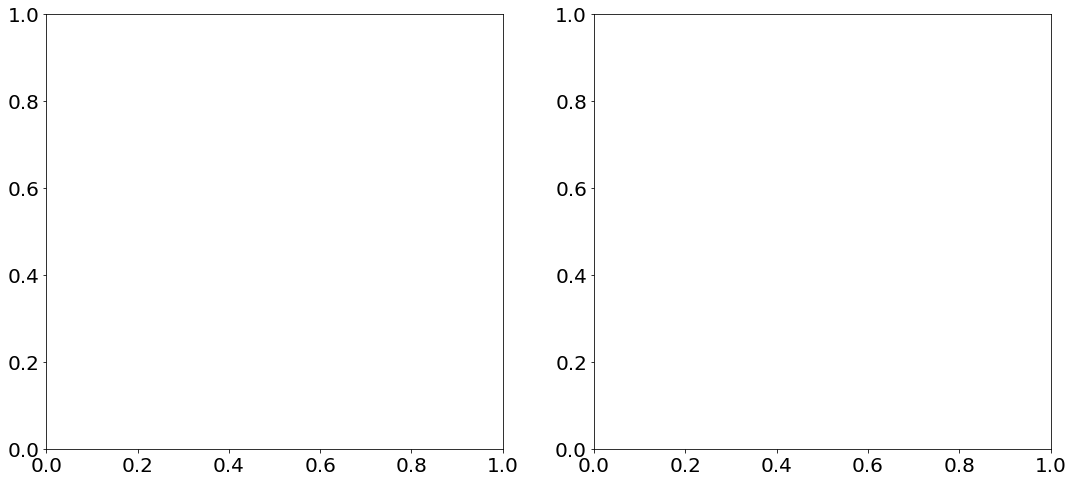

In [671]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sal_coun=df.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('Salary',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])

KeyError: 'Country'

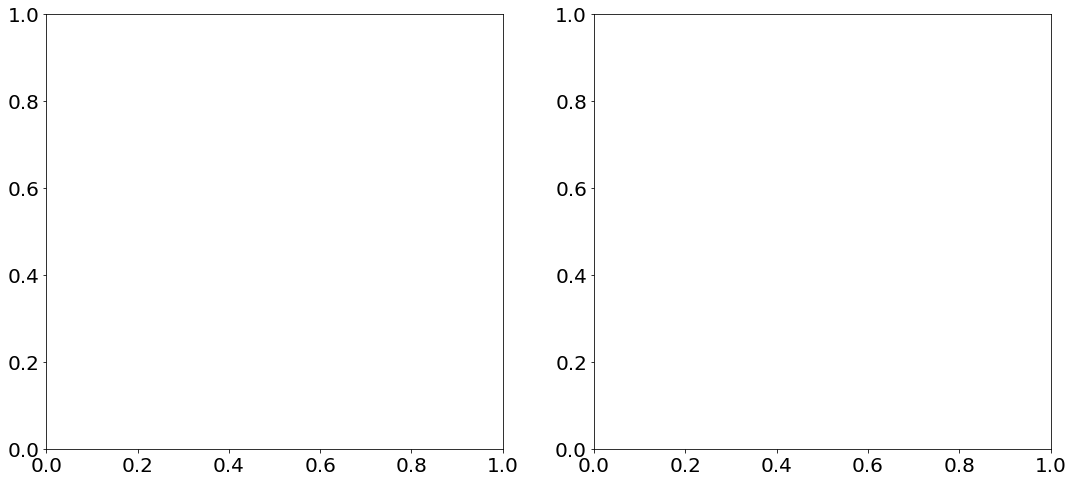

In [670]:


f,ax=plt.subplots(1,2,figsize=(18,8))
sal_coun=df.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('Salary',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])
ax[0].axvline(salary['Salary'].median(),linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')
max_coun=salary.groupby('Country')['Salary'].median().to_frame()
max_coun=max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by='Salary',ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
ax[1].axvline(salary['Salary'].median(),linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()



In [ ]:
# Handle categorical and missing data

4. Modeling

5. Visualization

6. Evaluation